<a href="https://colab.research.google.com/github/MinMolang/keras/blob/master/Keras_Classification_CNN%EB%AA%A8%EB%93%88_%ED%85%8C%EC%8A%A4%ED%8A%B8(Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@MINJI PARK 200723
# CNN, DNN, RNN, ResNet, Transformer 수행

"""Reference"""
# CNN TEST reference : https://pinkwink.kr/1121

In [ ]:
# #model_dispacher.py
# from sklearn import ensemble
# from sklearn import tree

# models  = {
#     'DNN' : tree.DecisionTreeClassifiter(
#         criterion='gini'
#     ),
#     'RNN' : tree.eDecisionTreeClassifiter(
#         criterion='entropy'
#     ),
#     'ResNet' : ensemble.RandomForestClassifier(),
#  }

**1. module import**

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
TensorFlow version :  2.2.0
Keras version :  2.3.1


Using TensorFlow backend.


In [2]:
#CHECK GPU
!nvidia-smi

Thu Jul 23 07:06:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

2. Dataset Read 

In [3]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

# Data - > Onehot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# Onehot encoding check
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)             

3. Model layer **Visualization**

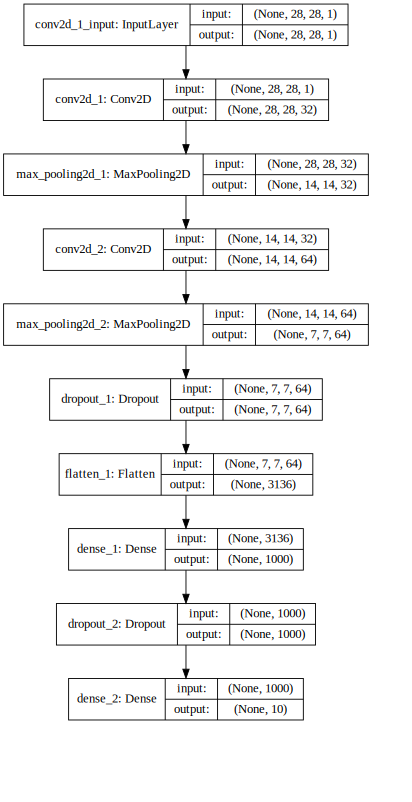

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
#svg format image resize option >> dpi = 65
SVG(model_to_dot(model, show_shapes=True ,dpi=65).create(prog='dot', format='svg'))

4. model compile
Let's decide loss cuntion, optimizer, metrics

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 153us/step - loss: 0.1950 - accuracy: 0.9397 - val_loss: 0.0525 - val_accuracy: 0.9827
Epoch 2/12
60000/60000 [==============================] - 3s 48us/step - loss: 0.0609 - accuracy: 0.9811 - val_loss: 0.0317 - val_accuracy: 0.9902
Epoch 3/12
60000/60000 [==============================] - 3s 48us/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0277 - val_accuracy: 0.9908
Epoch 4/12
60000/60000 [==============================] - 3s 49us/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0276 - val_accuracy: 0.9906
Epoch 5/12
60000/60000 [==============================] - 3s 49us/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0225 - val_accuracy: 0.9923
Epoch 6/12
60000/60000 [==============================] - 3s 48us/step - loss: 0.0276 - accuracy: 0.9906 - val_loss: 0.0239 - val_accuracy: 0.9915
Epoch 7/12
60000/60000 [==============================] - 3s 48us/s

5. Evaluate

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024098734943399723
Test accuracy: 0.9926999807357788


In [9]:
import matplotlib.pyplot as plt


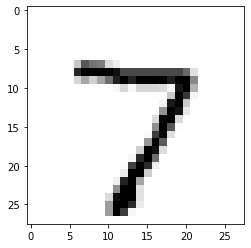

The Answer is  [7]


In [10]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))

6. Let's see Wrong results

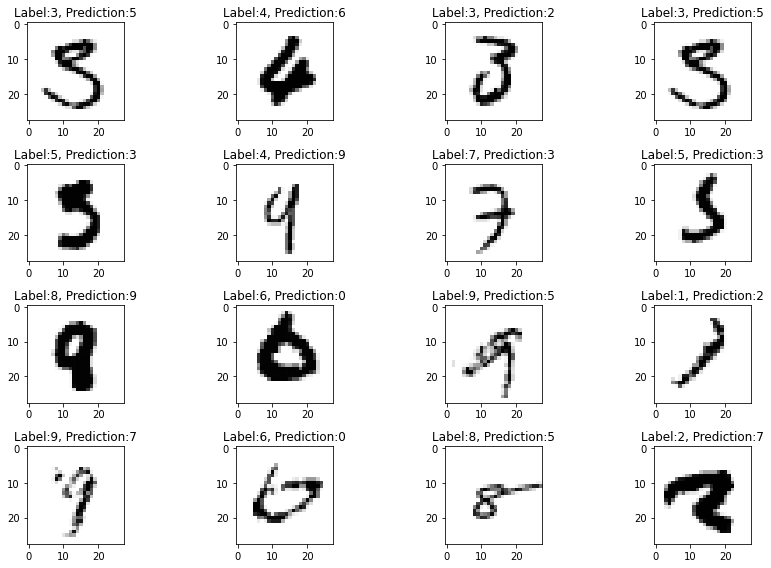

The wron results are 73


In [11]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

print(f"The wrong results are {len(wrong_result)}")

Result : 

In [ ]:
#########chcek another loss 